### Logistic Regression

- its a classification algorithm
- but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
- Instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
- This S shaped curve indicate Sigmoid function or logistic function
- maps any real value within a range of 0 and 1.
- In logistic regression, we use the concept of the threshold value,

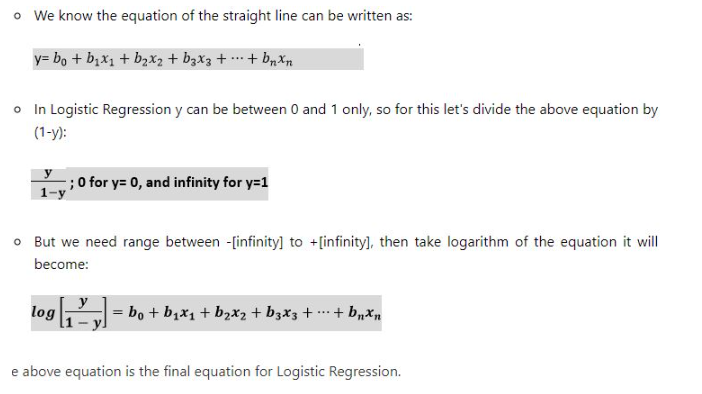

In [1]:
### How may types of Logistic Regression are there??

Logistic Regression can be classified into three types:

**Binomial LR:** 
only two possible types of output, e.g. 0 or 1, Pass or Fail, etc.

**Multinomial LR:**
3 or more possible ouputs, but there r not ordered 
such as "cat", "dogs", or "sheep"

**Ordinal LR:** 
3 or more possible ordered output, such as "low", "Medium", or "High", good, better and best etc

In [2]:
### Python Implementation of Logistic Regression

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
df=sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()

In [8]:
df.species=le.fit_transform(df['species'])
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [9]:
df.species.unique()

array([0, 1, 2])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [14]:
y_pred=lr.predict(X_test)

In [15]:
# mesuring accuracy of the model

from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

In [16]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [17]:
try:
    recall_score(y_test,y_pred)
except:
    print('''ValueError: Target is multiclass but average='binary'. Please choose another average setting, 
          one of [None, 'micro', 'macro', 'weighted']''')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, 
          one of [None, 'micro', 'macro', 'weighted']


In [18]:
recall_score(y_test,y_pred,average='weighted')

0.9666666666666667

In [19]:
f1_score(y_test,y_pred,average='weighted')

0.9672820512820512

In [20]:
### Understanding Parameters of Logistic Regression


    penalty='l2',
        *,
        dual=False,
        tol=0.0001,
        C=1.0,
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        random_state=None,
        solver='lbfgs',
        max_iter=100,
        multi_class='auto',
        verbose=0,
        warm_start=False,
        n_jobs=None,
        l1_ratio=None,
    )
    Docstring:     
    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    that regularization is applied by default**. It can handle both dense
    and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
    floats for optimal performance; any other input format will be converted
    (and copied).

    The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
    with primal formulation, or no regularization. The 'liblinear' solver
    supports both L1 and L2 regularization, with a dual formulation only for
    the L2 penalty. The Elastic-Net regularization is only supported by the
    'saga' solver.

    Read more in the :ref:`User Guide <logistic_regression>`.

    Parameters
    ----------
    penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2'
        Used to specify the norm used in the penalization. The 'newton-cg',
        'sag' and 'lbfgs' solvers support only l2 penalties. 'elasticnet' is
        only supported by the 'saga' solver. If 'none' (not supported by the
        liblinear solver), no regularization is applied.

        .. versionadded:: 0.19
           l1 penalty with SAGA solver (allowing 'multinomial' + L1)

    dual : bool, default=False
        Dual or primal formulation. Dual formulation is only implemented for
        l2 penalty with liblinear solver. Prefer dual=False when
        n_samples > n_features.

    tol : float, default=1e-4
        Tolerance for stopping criteria.

    C : float, default=1.0
        Inverse of regularization strength; must be a positive float.
        Like in support vector machines, smaller values specify stronger
        regularization.

    fit_intercept : bool, default=True
        Specifies if a constant (a.k.a. bias or intercept) should be
        added to the decision function.

    intercept_scaling : float, default=1
        Useful only when the solver 'liblinear' is used
        and self.fit_intercept is set to True. In this case, x becomes
        [x, self.intercept_scaling],
        i.e. a "synthetic" feature with constant value equal to
        intercept_scaling is appended to the instance vector.
        The intercept becomes ``intercept_scaling * synthetic_feature_weight``.

        Note! the synthetic feature weight is subject to l1/l2 regularization
        as all other features.
        To lessen the effect of regularization on synthetic feature weight
        (and therefore on the intercept) intercept_scaling has to be increased.

    class_weight : dict or 'balanced', default=None
        Weights associated with classes in the form ``{class_label: weight}``.
        If not given, all classes are supposed to have weight one.

        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``.

        Note that these weights will be multiplied with sample_weight (passed
        through the fit method) if sample_weight is specified.

        .. versionadded:: 0.17
           *class_weight='balanced'*

    random_state : int, RandomState instance, default=None
        Used when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle the
        data. See :term:`Glossary <random_state>` for details.

    solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},             default='lbfgs'

        Algorithm to use in the optimization problem.

        - For small datasets, 'liblinear' is a good choice, whereas 'sag' and
          'saga' are faster for large ones.
        - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'
          handle multinomial loss; 'liblinear' is limited to one-versus-rest
          schemes.
        - 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
        - 'liblinear' and 'saga' also handle L1 penalty
        - 'saga' also supports 'elasticnet' penalty
        - 'liblinear' does not support setting ``penalty='none'``

        Note that 'sag' and 'saga' fast convergence is only guaranteed on
        features with approximately the same scale. You can
        preprocess the data with a scaler from sklearn.preprocessing.

        .. versionadded:: 0.17
           Stochastic Average Gradient descent solver.
        .. versionadded:: 0.19
           SAGA solver.
        .. versionchanged:: 0.22
            The default solver changed from 'liblinear' to 'lbfgs' in 0.22.

    max_iter : int, default=100
        Maximum number of iterations taken for the solvers to converge.

    multi_class : {'auto', 'ovr', 'multinomial'}, default='auto'
        If the option chosen is 'ovr', then a binary problem is fit for each
        label. For 'multinomial' the loss minimised is the multinomial loss fit
        across the entire probability distribution, *even when the data is
        binary*. 'multinomial' is unavailable when solver='liblinear'.
        'auto' selects 'ovr' if the data is binary, or if solver='liblinear',
        and otherwise selects 'multinomial'.

        .. versionadded:: 0.18
           Stochastic Average Gradient descent solver for 'multinomial' case.
        .. versionchanged:: 0.22
            Default changed from 'ovr' to 'auto' in 0.22.

    verbose : int, default=0
        For the liblinear and lbfgs solvers set verbose to any positive
        number for verbosity.

    warm_start : bool, default=False
        When set to True, reuse the solution of the previous call to fit as
        initialization, otherwise, just erase the previous solution.
        Useless for liblinear solver. See :term:`the Glossary <warm_start>`.

        .. versionadded:: 0.17
           *warm_start* to support *lbfgs*, *newton-cg*, *sag*, *saga* solvers.

    n_jobs : int, default=None
        Number of CPU cores used when parallelizing over classes if
        multi_class='ovr'". This parameter is ignored when the ``solver`` is
        set to 'liblinear' regardless of whether 'multi_class' is specified or
        not. ``None`` means 1 unless in a :obj:`joblib.parallel_backend`
        context. ``-1`` means using all processors.
        See :term:`Glossary <n_jobs>` for more details.

    l1_ratio : float, default=None
        The Elastic-Net mixing parameter, with ``0 <= l1_ratio <= 1``. Only
        used if ``penalty='elasticnet'``. Setting ``l1_ratio=0`` is equivalent
        to using ``penalty='l2'``, while setting ``l1_ratio=1`` is equivalent
        to using ``penalty='l1'``. For ``0 < l1_ratio <1``, the penalty is a
        combination of L1 and L2.

    Attributes
    ----------

    classes_ : ndarray of shape (n_classes, )
        A list of class labels known to the classifier.

    coef_ : ndarray of shape (1, n_features) or (n_classes, n_features)
        Coefficient of the features in the decision function.

        `coef_` is of shape (1, n_features) when the given problem is binary.
        In particular, when `multi_class='multinomial'`, `coef_` corresponds
        to outcome 1 (True) and `-coef_` corresponds to outcome 0 (False).

    intercept_ : ndarray of shape (1,) or (n_classes,)
        Intercept (a.k.a. bias) added to the decision function.

        If `fit_intercept` is set to False, the intercept is set to zero.
        `intercept_` is of shape (1,) when the given problem is binary.
        In particular, when `multi_class='multinomial'`, `intercept_`
        corresponds to outcome 1 (True) and `-intercept_` corresponds to
        outcome 0 (False).

    n_iter_ : ndarray of shape (n_classes,) or (1, )
        Actual number of iterations for all classes. If binary or multinomial,
        it returns only 1 element. For liblinear solver, only the maximum
        number of iteration across all classes is given.

        .. versionchanged:: 0.20

            In SciPy <= 1.0.0 the number of lbfgs iterations may exceed
            ``max_iter``. ``n_iter_`` will now report at most ``max_iter``.

    See Also
    --------
    SGDClassifier : Incrementally trained logistic regression (when given
        the parameter ``loss="log"``).
    LogisticRegressionCV : Logistic regression with built-in cross validation.

    Notes
    -----
    The underlying C implementation uses a random number generator to
    select features when fitting the model. It is thus not uncommon,
    to have slightly different results for the same input data. If
    that happens, try with a smaller tol parameter.

    Predict output may not match that of standalone liblinear in certain
    cases. See :ref:`differences from liblinear <liblinear_differences>`
    in the narrative documentation.

    References
    ----------

    L-BFGS-B -- Software for Large-scale Bound-constrained Optimization
        Ciyou Zhu, Richard Byrd, Jorge Nocedal and Jose Luis Morales.
        http://users.iems.northwestern.edu/~nocedal/lbfgsb.html

    LIBLINEAR -- A Library for Large Linear Classification
        https://www.csie.ntu.edu.tw/~cjlin/liblinear/

    SAG -- Mark Schmidt, Nicolas Le Roux, and Francis Bach
        Minimizing Finite Sums with the Stochastic Average Gradient
        https://hal.inria.fr/hal-00860051/document

    SAGA -- Defazio, A., Bach F. & Lacoste-Julien S. (2014).
        SAGA: A Fast Incremental Gradient Method With Support
        for Non-Strongly Convex Composite Objectives
        https://arxiv.org/abs/1407.0202

    Hsiang-Fu Yu, Fang-Lan Huang, Chih-Jen Lin (2011). Dual coordinate descent
        methods for logistic regression and maximum entropy models.
        Machine Learning 85(1-2):41-75.
        https://www.csie.ntu.edu.tw/~cjlin/papers/maxent_dual.pdf

    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn.linear_model import LogisticRegression
    >>> X, y = load_iris(return_X_y=True)
    >>> clf = LogisticRegression(random_state=0).fit(X, y)
    >>> clf.predict(X[:2, :])
    array([0, 0])
    >>> clf.predict_proba(X[:2, :])
    array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
           [9.7...e-01, 2.8...e-02, ...e-08]])
    >>> clf.score(X, y)
    0.97...
    File:           c:\programdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py
    Type:           type
    Subclasses:     LogisticRegression